In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset/new-models/datasets/xray_pneumonia.zip
!unzip /content/drive/MyDrive/Dataset/new-models/datasets/Perturbed-Proper-Images.zip
!unzip /content/drive/MyDrive/Dataset/new-models/datasets/Mixed-Proper-Images.zip

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

### Load Model

In [ ]:
pip install vit-keras tensorflow tensorflow-addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from vit_keras import vit

In [ ]:
# Once training is complete, load the best model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/new-models/vit/vitB32_pneumonia_detection.tf')

### Check on folders

In [ ]:
# Directory paths for train, validation, and test sets
train_dir = '/content/xray_pneumonia/train'
test_dir ='/content/xray_pneumonia/test'
val_dir ='/content/xray_pneumonia/val'
pertur_dir = '/content/Perturbed-Proper-Images'
mixed_dir = '/content/Mixed-Proper-Images'

In [ ]:
# Expand the single-channel greyscale image into three channels
def expand_greyscale_image_channels(image):
    return np.repeat(image[:, :, np.newaxis], 3, axis=-1)

# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from itertools import chain

# Generate batches of augmented data for train, validation, and test sets
train_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

pertur_generator = test_datagen.flow_from_directory(
    pertur_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

mixed_generator = test_datagen.flow_from_directory(
    mixed_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

Found 5546 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 959 images belonging to 2 classes.
Found 6505 images belonging to 2 classes.


In [ ]:
print(train_generator.image_shape)
print("Number of images in train_generator:", train_generator.n)
print("Number of images in test_generator:", test_generator.n)
print("Number of images in val_generator:", val_generator.n)
print("Number of images in pertur_generator:", pertur_generator.n)
print("Number of images in mixed_generator:", mixed_generator.n)

(224, 224, 3)
Number of images in train_generator: 5546
Number of images in test_generator: 624
Number of images in val_generator: 16
Number of images in pertur_generator: 959
Number of images in mixed_generator: 6505


In [ ]:
# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

174/174 [==============================] - 75s 390ms/step - loss: 0.1726 - accuracy: 0.9378
Train Loss: 0.1726338118314743
Train Accuracy: 0.9377930164337158


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 7s 349ms/step - loss: 0.4306 - accuracy: 0.8157
Test Loss: 0.43063676357269287
Test Accuracy: 0.8157051205635071


In [ ]:
# Evaluate the model on the test set
pertur_loss, pertur_accuracy = model.evaluate(pertur_generator)
print("Pertur Loss:", pertur_loss)
print("Pertur Accuracy:", pertur_accuracy)

30/30 [==============================] - 4s 130ms/step - loss: 0.2814 - accuracy: 0.8989
Pertur Loss: 0.2813595235347748
Pertur Accuracy: 0.8988529443740845


In [ ]:
# Evaluate the model on the test set
mixed_loss, mixed_accuracy = model.evaluate(mixed_generator)
print("Mixed Loss:", mixed_loss)
print("Mixed Accuracy:", mixed_accuracy)

204/204 [==============================] - 67s 327ms/step - loss: 0.1887 - accuracy: 0.9321
Mixed Loss: 0.18866272270679474
Mixed Accuracy: 0.9320522546768188


### Check on images

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

height = 224
width = 224

def pred(image):
    data = []
    data.append(image)
    X_test = np.array(data)
    X_test = X_test.astype('float32')/255
    X_test = X_test.reshape(1,height,width,3)
    predict_x=model.predict(X_test)
    pred_target_image = 1 if predict_x[0, 0] > 0.5 else 0
    return pred_target_image

1/1 [==============================] - 3s 3s/step
Source  Pred :  0


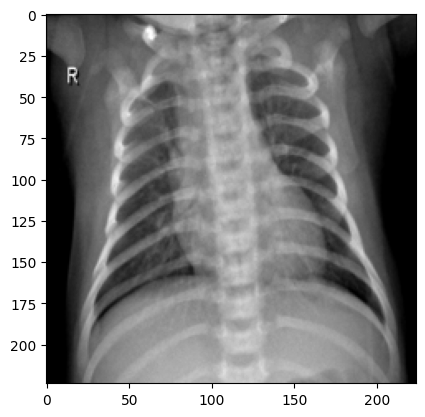

In [ ]:
source_image_path = "/content/drive/MyDrive/Dataset/xray_pneumonia/train/NORMAL/IM-0158-0001.jpeg"

img = (np.asarray(Image.open(source_image_path)))
if len(img.shape)==2: img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
image_from_array = Image.fromarray(img, 'RGB')
img1 = image_from_array.resize((height, width))
img1=np.array(img1)
img1=img1.reshape(height,width,3)
source_image = np.array(img1)

plt.imshow(source_image[:,:,0],cmap = "gray")
# plt.set_title(("Source  Pred : ",pred(source_image)))
print("Source  Pred : ",pred(source_image))